# **Logistic Regression: Theory, Implementation, and Application**.  

**Author**: David Thébault.  
**Date**: October 18, 2025.  
**Objective**: Understand, implement, and apply logistic regression for diabetes prediction.

## **Table of Contents**
1. [Introduction to Logistic Regression](#introduction-to-logistic-regression)
2. [Theory and Fundamentals](#theory-and-fundamentals)
   - Model and Assumptions
   - Coefficient Interpretation
   - Cost Function and Optimization
3. [Implementation with `statsmodels`](#implementation-with-statsmodels)
   - Data Preparation
   - Training and Interpretation
4. [Implementation "From Scratch"](#implementation-from-scratch)
   - Gradient Descent Algorithm
   - Testing and Validation
5. [Application: Diabetes Prediction](#application-diabetes-prediction)
   - Data Preparation
   - Prediction and Interpretation
6. [Appendices](#appendices)
   - Mathematical Demonstrations
   - Wald Statistic and Deviance
7. [References](#references)
---

## Introduction to Logistic Regression {#introduction-to-logistic-regression}

The Logistic regression applies to cases where:

* $Y$ is a random qualitative variable with 2 categories (a binary variable by convention, $Y = 0$ if the event does not occur, and $Y = 1$ if it does),
* $X_1,\ldots,X_k$ are non-random qualitative or quantitative variables ($K$ explanatory variables in total).

* $(Y, X_1,\ldots,X_k)$ represent the population variables, from which a sample of $n$ individuals $(i)$ is drawn, and $(y, x_i)$ is the vector of observed realizations of $(Y_i, X_i)$ for each individual in the sample.

Unlike simple linear regression, logistic regression estimates **the probability** of an event occurring, rather than predicting a specific numerical value.

## Theory and Fundamentals {#theory-and-fundamentals}

### Probabilistic Model

This section describes the underlying probabilistic framework of the model, focusing on the random variable and its distribution.

**The Model**  

The variable $Y_i$ follows a **Bernoulli distribution** with parameter $p_i$ representing the probability that $Y_i=1$.    

$$Y_i \sim B(p_i)$$

The probabilities are defined as:  

$$P(Y_i=1) = p_i \quad, \quad P(Y_i = 0) = 1 - p_i$$

This can also be written as:: 

$$P(Y_i = k) = {p_i}^k(1 - p_i)^{1-k} \quad \text{for k} \in \{0, 1\}$$

### LOGIT Model

This section focuses on the specific form of the logistic regression model, which is a type of probabilistic model.  

**The Linear Logit Model**

To ensure that the expected value of $Y, E(Y)$, only takes values between 0 and 1, we use the **logistic function**:  

$$f(x) = \dfrac{\text{exp(x)}}{1 + \text{exp(x)}} = p$$

or equivalently:  

$$f(x) = \dfrac{1}{1 + \text{exp(-x)}} = p$$

This guarantees that $0 < f(x) < 1$, so $E[Y]$ can represent a valid probability.  

The **logit function** transforms a probability $p$ into an **unrestricted real value**:

**Notations**:
* $X = (1,X_1, \ldots, X_k)$ vector of predictors, including the intercept term.
* $\beta = (\beta_0,\beta_1, \ldots, \beta_k)$ vector of coefficients.

**Logit Transformation**

The logit of a probability $p$ is defined as:

$$\text{logit}(p) = \text{log}(\dfrac{p}{1 - p})$$

In the context of logistic regression, the logit of the probability is modeled as a linear combination of the predictors:

$$\text{logit}(p) = \beta .X$$

Explicitly, this can be written as:

$$\text{logit}(p) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k$$

Or equivalently:

$$\text{log}\left( \dfrac{p}{1-p} \right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k$$

**Inverse Transformation: Logistic Function**. 

To convert the linear predictor back into a probability, we use **the logistic function (the inverse of the logit function)**:

$$p = \frac{1}{1 + \exp(-\beta .X)}$$

Demonstration: 

$$p(x) = \dfrac{1}{1 + \exp(-\beta x)}$$

$$\underset{inverse}   \iff \dfrac{1}{p} = 1 + \exp(-\beta x)$$

$$\iff \dfrac{1}{p} - 1 = \exp(-\beta x)$$

$$\iff \dfrac{1}{p} - \dfrac{p}{p} = \exp(-\beta x)$$

$$\iff \dfrac{1-p}{p} = \exp(-\beta x)$$

$$\iff \log(\dfrac{1-p}{p}) = -\beta x$$

$$\iff \log(\dfrac{p}{1-p}) = \beta x$$

For simplicity, we often write $p$ instead of $p(x)$ when the context is clear. 

### Model Assumptions {#model-assumptions}

For the **logistic regression model** to be valid and generalizable, the following key assumptions must be satisfied. Violations of these assumptions can lead to biased or inefficient estimates, and may compromise the interpretability of the model.

---

#### 1. Linearity of Log-Odds {#linearity-of-log-odds}
**Assumption:**
The relationship between **each continuous predictor** ($X_j$) and the **log-odds** of the outcome ($Y=1$) must be **linear**. Mathematically, this means:
$$\log\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k$$

**Implications:**
- If the true relationship is non-linear (e.g., quadratic or U-shaped), the linear assumption will not hold.
- **How to check:** Plot the log-odds against each continuous predictor. If the relationship appears curved, consider adding polynomial terms or splines.

**Example:**
If `age` is a predictor, the log-odds of diabetes should increase or decrease linearly with `age`. If the relationship is non-linear, you might need to add a quadratic term (e.g., `age²`).

---

#### 2. No Multicollinearity {#no-multicollinearity}
**Assumption:**
Predictor variables should **not be highly correlated** with each other. High multicollinearity can inflate the variance of coefficient estimates, making them unstable and difficult to interpret.

**Implications:**
- Multicollinearity does not bias the model, but it reduces the precision of the estimated coefficients.
- **How to check:** Use **Variance Inflation Factor (VIF)**. A VIF > 5 or 10 indicates problematic multicollinearity.

**Example:**
If your model includes both `blood_pressure` and `blood_pressure_squared`, these variables are likely to be highly correlated. Consider removing one or using regularization (e.g., Lasso or Ridge).

---

#### 3. Additivity {#additivity}
**Assumption:**
The effect of each predictor on the log-odds of the outcome is **additive**. This means the contribution of each predictor to the log-odds is independent of the values of the other predictors.

**Implications:**
- If there are **interaction effects** (e.g., the effect of `age` on diabetes depends on `BMI`), they must be explicitly modeled.
- **How to check:** Test for interactions by adding product terms (e.g., `age × BMI`) to the model and evaluating their significance.

**Example:**
If the effect of `glucose` on diabetes risk depends on `age`, you should include an interaction term like `glucose × age` in your model.

---

#### 4. Independence of Observations {#independence-of-observations}
**Assumption:**
The model assumes that **observations are independent** of each other. This is critical for the validity of standard errors and hypothesis tests.

**Implications:**
- If observations are correlated (e.g., repeated measurements from the same individual or clustered data), standard errors will be underestimated, leading to inflated Type I error rates.
- **How to check:** Look for patterns in residuals or use tests for autocorrelation (e.g., Durbin-Watson test for time-series data).

**Example:**
If your dataset includes multiple measurements from the same patient over time, you should use a **mixed-effects logistic regression** or **GEE (Generalized Estimating Equations)** to account for within-patient correlation.

---

#### Summary Table of Assumptions
| Assumption                | Description                                                                                     | How to Check                                  | Solution if Violated                          |
|---------------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **No Multicollinearity**  | Predictors are not highly correlated.                                                         | Calculate VIF.                                | Remove predictors or use regularization.     |
| **Linearity of Log-Odds**  | Continuous predictors have a linear relationship with the log-odds of the outcome.             | Plot log-odds vs. predictors.                 | Add polynomial/spline terms.                 |
| **Additivity**            | The effect of each predictor is independent of other predictors.                              | Test for interactions.                       | Add interaction terms.                        |
| **Independence**          | Observations are independent (no clustering or repeated measures).                           | Check residuals for patterns.                | Use mixed-effects models or GEE.              |

---



## Practical Implementation of Logistic Regression

#### Recommendations
1. **Always check assumptions** before interpreting your model.
2. **Use diagnostic plots** (e.g., residual plots, VIF) to identify violations.
3. **Consider regularization** (Lasso/Ridge) if multicollinearity is an issue.
4. **Model interactions** if additivity is violated.
5. **Use robust standard errors** or mixed-effects models if observations are not independent.


### Data Preprocessing

This notebook aims to provide a **comprehensive overview of logistic regression**, including its theoretical foundations, implementation, and practical application to real-world datasets.

**Note on Data Preprocessing:**  
For simplicity and clarity, the data preprocessing steps in this notebook are applied to the **entire dataset before the train-test split**.  
However, it is important to note that in a real-world scenario, preprocessing (such as standardization, encoding, and imputation) should be performed only on the training dataset to avoid data leakage.  
The same preprocessing steps should then be applied to the test dataset using the parameters (e.g., mean, standard deviation) derived from the training dataset.

In [393]:
# The libraries imports
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [394]:
from scipy.stats import pointbiserialr

# Correlation Point-Biserial
def calculate_point_biserial(df, numeric_vars, dummy_vars):
    point_biserial_results = pd.DataFrame(index=numeric_vars, columns=dummy_vars)
    for num_var in numeric_vars:
        for dummy_var in dummy_vars:
            corr, _ = pointbiserialr(df[num_var], df[dummy_var])
            point_biserial_results.loc[num_var, dummy_var] = corr
    return point_biserial_results

# Eigenvalues & Condition Number
def calculate_eigenvalues_condition_number(df):
    corr_matrix = df.corr()
    eigenvalues = np.linalg.eigvals(corr_matrix)
    condition_number = np.max(eigenvalues) / np.min(eigenvalues)
    return eigenvalues, condition_number


In [395]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calculate_gvif(dataframe: pd.DataFrame, categorical_vars: list, degrees_of_freedom: int) -> pd.DataFrame:
    """
    Calculate Generalized Variance Inflation Factor (GVIF) for categorical variables and
    Variance Inflation Factor (VIF) for continuous variables in a DataFrame.

    GVIF adjusts for the degrees of freedom associated with categorical variables, providing
    a more accurate measure of multicollinearity for dummy variables.

    Parameters:
    -----------
    dataframe : pd.DataFrame
        The DataFrame containing the predictors (both continuous and dummy variables).
    categorical_vars : list
        A list of column names corresponding to the dummy variables derived from categorical variables.
    degrees_of_freedom : int
        The degrees of freedom for the categorical variables (k - 1, where k is the number of categories).

    Returns:
    --------
    pd.DataFrame
        A DataFrame with two columns: "Variable" and "GVIF^(1/(2*d))", containing the GVIF/VIF values
        for each variable in the input DataFrame.
    """
    # Create a copy of the input DataFrame and add a constant for the intercept
    dataframe_with_const = dataframe.copy()
    dataframe_with_const['const'] = 1

    # Initialize a DataFrame to store the results
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe_with_const.columns
    vif_data["GVIF"] = 1  # Initialize with 1

    # Calculate GVIF for categorical variables and VIF for continuous variables
    for index, variable in enumerate(dataframe_with_const.columns):
        if variable in categorical_vars or variable == 'const':
            # For categorical variables, calculate GVIF^(1/(2*d))
            d = degrees_of_freedom if variable != 'const' else 1
            vif = variance_inflation_factor(dataframe_with_const.values, index)
            gif = vif ** (1 / (2 * d)) if variable != 'const' else vif
            vif_data.loc[vif_data["Variable"] == variable, "GVIF"] = gif
        else:
            # For continuous variables, calculate VIF
            vif = variance_inflation_factor(dataframe_with_const.values, index)
            vif_data.loc[vif_data["Variable"] == variable, "GVIF"] = vif

    return vif_data

In [396]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((k_corr-1), (r_corr-1)))

def cramers_v_matrix(df, categorical_columns):
    """Calculate Cramer's V matrix for a list of categorical columns."""
    n_columns = len(categorical_columns)
    cramersv_matrix = np.zeros((n_columns, n_columns))

    for i in range(n_columns):
        for j in range(n_columns):
            cramersv_matrix[i, j] = cramers_v(df[categorical_columns[i]], df[categorical_columns[j]])

    cramersv_df = pd.DataFrame(cramersv_matrix, index=categorical_columns, columns=categorical_columns)
    return cramersv_df

We will use the diabetes dataset to show how to perform logistic regression in Python.

In [397]:
# Load the dataset
data_path = '/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/data/external'
file_path = os.path.join(data_path, 'diabetes.csv')
df = pd.read_csv(file_path)

# Standardize column names to lowercase
df.columns = [col for col in df.columns.str.lower()]
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Modification of the initial dataset

The initial dataset only contains numerical variables. For pedagogical purposes, we will incorporate categorical variables in a logistic regression model to predict diabetes.  
Note tha categorize continuous variables can help to better capture non-linear relationships and improve interpretability.  

**Age:** the age variable will be categorized into three distinct groups: 

* Young
* Middle-aged
* Senior

**Number of pregnancies:** this variable will be categorized based on medical thresholds into the following groups:

* None (0 pregnancies)
* Low (1-2 pregnancies)
* Moderate (3-5 pregnancies)
* High (6 or more pregnancies)

In [398]:
# Categorize 'age' into 3 categories
bins_age = [20, 30, 50, 100]
labels_age = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, include_lowest=True)

# Check the distribution of age categories
df['age_category'].value_counts()

age_category
Young          417
Middle-aged    270
Senior          81
Name: count, dtype: int64

In [399]:
# Categorize 'number of pregnancies' into 3 categories
bins = [-1, 0, 2, 5, float('inf')]
labels = ['None', 'Low', 'Moderate', 'High']
df['pregnancies_category'] = pd.cut(df['pregnancies'], bins=bins, labels=labels)

# Check the distribution of age categories
df['pregnancies_category'].value_counts()

pregnancies_category
Low         238
High        219
Moderate    200
None        111
Name: count, dtype: int64

In [400]:
df.drop(columns=['age', 'pregnancies'], inplace=True)
df.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,outcome,age_category,pregnancies_category
0,148,72,35,0,33.6,0.627,1,Middle-aged,High
1,85,66,29,0,26.6,0.351,0,Middle-aged,Low
2,183,64,0,0,23.3,0.672,1,Middle-aged,High
3,89,66,23,94,28.1,0.167,0,Young,Low
4,137,40,35,168,43.1,2.288,1,Middle-aged,None


In [401]:
X = df.drop(columns=['outcome'])
y = df['outcome']

### Train test split

In [402]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**The model is fitted using the training data (X_train) and tested on the test data (X_test).**

**Variable encoding and transformation:**  

1. Categorical variables: after categorization, **dummy encoding** (one-hot encoding) will be used to transform categorical variables into a format suitable for logistic regression.  

In [403]:
# Convert categorical variable to dummy variables
X_train_dum = pd.get_dummies(X_train, columns=['age_category','pregnancies_category'], drop_first=True).astype(int)
X_train_dum.columns = [col.replace('-','_') for col in X_train_dum.columns.str.lower()]

# Ensure all columns are numeric
X_train_dum = X_train_dum.apply(pd.to_numeric, errors='coerce')
X_train_dum.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age_category_middle_aged,age_category_senior,pregnancies_category_low,pregnancies_category_moderate,pregnancies_category_high
602,124,74,36,0,27,0,0,0,1,0,0
429,95,82,25,180,35,0,1,0,1,0,0
623,94,70,27,115,43,0,0,0,0,0,0
209,184,84,33,0,35,0,1,0,0,0,1
589,73,0,0,0,21,0,0,0,0,0,0


In [404]:
# We transform non categorical features to float to separate them from dummies features for correlation purposes
X_train_dum['glucose'] = X_train_dum['glucose'].astype(float)
X_train_dum['bloodpressure'] = X_train_dum['bloodpressure'].astype(float)
X_train_dum['skinthickness'] = X_train_dum['skinthickness'].astype(float)
X_train_dum['insulin'] = X_train_dum['insulin'].astype(float)
X_train_dum['bmi'] = X_train_dum['bmi'].astype(float)
X_train_dum['diabetespedigreefunction'] = X_train_dum['diabetespedigreefunction'].astype(float)

In [405]:
X_train_dum.dtypes

glucose                          float64
bloodpressure                    float64
skinthickness                    float64
insulin                          float64
bmi                              float64
diabetespedigreefunction         float64
age_category_middle_aged           int64
age_category_senior                int64
pregnancies_category_low           int64
pregnancies_category_moderate      int64
pregnancies_category_high          int64
dtype: object

**Variable encoding and transformation:**  

2. Continuous variables: This can be used as-is or **standardized** if they exhibit vastly different scales, ensuring that each variable contributes equally to the model.  

Standardizing continuous variables in logistic regression improves model performance and interpretability by scaling variables to have a mean of 0 and a standard deviation of 1. This helps with convergence and coefficient interpretation.  

We will standardize variables if their scales differ significantly, detected using the ***describe()*** method.

In [406]:
X_train_dum.drop([col for col in X_train_dum if ('age' in col) or ('pregnancies' in col) or ('outcome' in col)], axis=1).describe()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,121.936482,69.060261,20.258958,82.048860,31.374593,0.076547
std,31.829186,19.515785,16.191645,120.170912,7.794029,0.283886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.500000,0.000000,0.000000,27.000000,0.000000
50%,117.000000,72.000000,23.000000,22.500000,32.000000,0.000000
75%,142.000000,80.000000,32.000000,130.000000,36.000000,0.000000
max,199.000000,122.000000,99.000000,846.000000,67.000000,2.000000


When analyzing the range and the standard deviation of the variables, **Insulin** should be standardized and in a lower proportion, **glucose** could also be standardized but it is not strictly necessary.

In [407]:
from sklearn.preprocessing import StandardScaler

# Variables to standardize
continuous_vars_to_standardize = ['insulin']

# Standardization
scaler = StandardScaler()
X_train_dum_scale = X_train_dum.copy()
X_train_dum_scale[continuous_vars_to_standardize] = scaler.fit_transform(X_train_dum[continuous_vars_to_standardize])
X_train_dum_scale.head()

,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age_category_middle_aged,age_category_senior,pregnancies_category_low,pregnancies_category_moderate,pregnancies_category_high
602,124.0,74.0,36.0,-0.683325,27.0,0.0,0,0,1,0,0
429,95.0,82.0,25.0,0.815763,35.0,0.0,1,0,1,0,0
623,94.0,70.0,27.0,0.274426,43.0,0.0,0,0,0,0,0
209,184.0,84.0,33.0,-0.683325,35.0,0.0,1,0,0,0,1
589,73.0,0.0,0.0,-0.683325,21.0,0.0,0,0,0,0,0


### **Checking the first model assumption: No Multicolinearity**

**1. $\text{VIF}$ for numeric variables** 

VIF (Variance Inflation Factor) is the most common method to detect multicollinearity and works well for continuous variables.  
Fit a linear regression model for each predictor against all other predictors and calculate VIF as $R^2$ inverse.  

Interpretation:

* $\text{VIF} < 5$: No problematic multicollinearity.
* $5 \leq \text{VIF} < 10$: Moderate multicollinearity, monitor closely.
* $\text{VIF} \geq 10$: High multicollinearity, needs correction.  

**1'. $\text{GVIF}$ for categorical variables (dummy variables)** 

For categorical variables, use Generalized Variance Inflation Factor ($\text{GVIF}$) instead of $\text{VIF}$.  

$\text{GVIF}$ provides a more accurate measure of multicollinearity for categorical variables because it takes into account the degrees of freedom $(\text{d})$ associated with categorical variables.

Interpretation:
* $\text{GVIF} = \text{VIF}^{\frac{1}{2\text{d}}} < 2$: No problematic multicollinearity.
* $\text{GVIF} = \text{VIF}^{\frac{1}{2\text{d}}} \geq 2$: Indicates potential multicollinearity.  

**Degrees of freedom $(d)$** refer to the number of independent pieces of information available to estimate a parameter.   
For a categorical variable with $k$ levels, the degrees of freedom are $k−1$ because one level is used as the reference category.  

When we create dummy variables from a categorical variable, the dummy variables are not independent of each other.  
To avoid ta perfect multicollinearity, we drop one dummy variable (reference category), leaving you with $k−1$ dummy variables.  

**VIF** treats each dummy variable as an independent predictor, which can overestimate multicollinearity because it doesn't account for the shared variance among dummy variables from the same categorical variable.  
**GVIF** adjusts for this by considering the degrees of freedom of the categorical variable. It essentially "penalizes" the VIF value to account for the fact that the dummy variables are related.  

**VIF** overestimates multicollinearity for **dummy variables** because it treats them as independent predictors.

**3. Pearson correlation for numeric variables** 

Use Pearson correlation to detect multicolinearity amoung numeric variables.  

Interpretation:
* Values close to 1 or -1 indicate strong linear relationships.

**4. Point-Biserial correlation**

Measure the association (pairwise correlation) between numeric and dummy variables. It is essentially a special case of Pearson correlation where one variable is binary.

Interpretation:

* High absolute values (close to 1 or -1) indicate a strong association between the numeric and dummy variables.

In [415]:
# Calculate the corrélation Point-Biserial
point_biserial_results = calculate_point_biserial(X_train_dum_scale, continuous_vars, dummy_vars)
print("\nPoint-Biserial Correlation:")
print(point_biserial_results.to!string())

SyntaxError: invalid syntax (3848718580.py, line 4)


Condition Number: 13.13


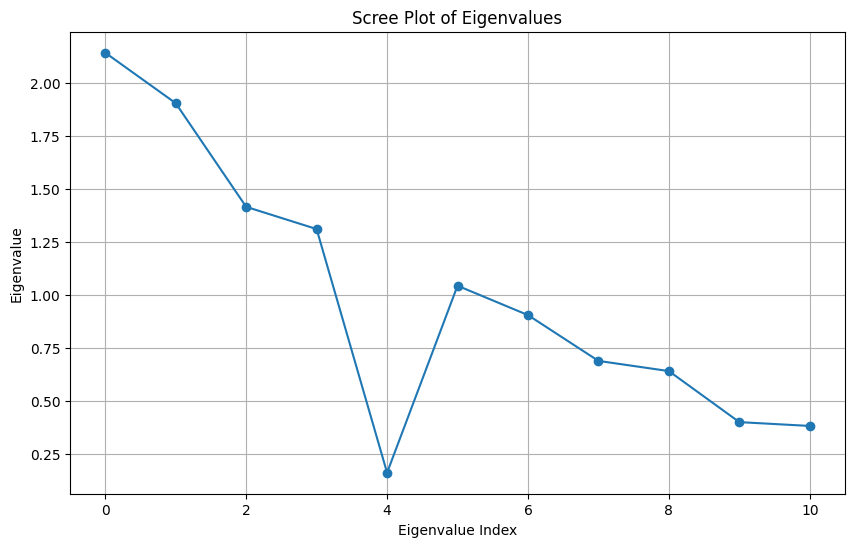

In [409]:
# Calculate the eigenvalues and the condition number
eigenvalues, condition_number = calculate_eigenvalues_condition_number(X_train_dum_scale)
print(f"\nCondition Number: {condition_number:.2f}")

# Visualiser les eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

**5. Eigenvalues and Condition Number**  

Check the eigenvalues of the correlation matrix of numeric and dummy variables to detect multicollinearity.

This analysis applies to the entire set of predictors (both numeric and dummy variables) included in the model.
Ensure all variables are numeric (dummy variables are already numeric, encoded as 0 or 1).

Interpretation:

Condition Number: 
* A high condition number (e.g., > 30) indicates potential multicollinearity. 

Eigenvalues: 
* A scree plot with some eigenvalues close to zero suggests multicollinearity.
* If one or more eigenvalues are near zero, it indicates that some predictors are linear combinations of others.

**6. Pair Plot for Dummy Variables**  

Visualize the relationships between dummy variables using a pair plot.   

Interpretation:

Look for patterns that indicate strong associations between dummy variables.

In [410]:
# Define degrees of freedom for each categorical variable
degrees_of_freedom_dict = {
    'age_category_middle_aged': 2,  # 3 levels - 1
    'age_category_senior': 2,        # 3 levels - 1
    'pregnancies_category_low': 3,        # 4 levels - 1
    'pregnancies_category_moderate': 3,        # 4 levels - 1
    'pregnancies_category_high': 3        # 4 levels - 1
}

dummy_vars = ['age_category_middle_aged','age_category_senior','pregnancies_category_low','pregnancies_category_moderate','pregnancies_category_high']
continuous_vars = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']

In [411]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calculate_multicollinearity(df, continuous_vars, dummy_vars, degrees_of_freedom_dict):
    """
    Calculate VIF for continuous variables and GVIF for dummy variables.

    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing predictors.
    continuous_vars : list
        List of continuous variable names.
    dummy_vars : list
        List of dummy variable names.
    degrees_of_freedom_dict : dict
        Dictionary mapping dummy variables to their degrees of freedom.

    Returns:
    --------
    pd.DataFrame
        DataFrame with multicollinearity metrics for each variable.
    """
    df_with_const = df.assign(const=1)

    results = []
    for i, var in enumerate(df_with_const.columns):
        vif = variance_inflation_factor(df_with_const.values, i)

        if var in dummy_vars:
            d = degrees_of_freedom_dict[var]
            gif = vif ** (1 / (2 * d))
            results.append({"Variable": var, "Metric": "GVIF", "Value": gif})
        elif var in continuous_vars or var == 'const':
            results.append({"Variable": var, "Metric": "VIF", "Value": vif})

    return pd.DataFrame(results)


In [412]:
multicollinearity_data = calculate_multicollinearity(X_train_dum_scale, continuous_vars, dummy_vars, degrees_of_freedom_dict)
print(multicollinearity_data)

                         Variable Metric      Value
0                         glucose    VIF   1.362408
1                   bloodpressure    VIF   1.209473
2                   skinthickness    VIF   1.535867
3                         insulin    VIF   1.457967
4                             bmi    VIF   1.356810
5        diabetespedigreefunction    VIF   1.057445
6        age_category_middle_aged   GVIF   1.154213
7             age_category_senior   GVIF   1.098110
8        pregnancies_category_low   GVIF   1.149052
9   pregnancies_category_moderate   GVIF   1.146484
10      pregnancies_category_high   GVIF   1.199571
11                          const    VIF  45.962850


A $\text{VIF}$ of 1.36 for glucose means that the variance of the regression coefficient for glucose is multiplied by 1.36 due to multicollinearity with all other variables (both continuous and dummy) in the model.  
This indicates a low level of multicollinearity overall.
Given a $\text{VIF}$ of 1.36 for glucose, we can work backward to find $R^2_j$:
$$\text{VIF}_j = \dfrac{1}{1 - R^2_j}=1.36$$

Solving for $R^2_j$:
$$R^2_j \approx 0.2647$$

* This means that about 26.47% of the variance in the glucose variable is explained by all the other predictor variables in the model.
* This is a relatively low percentage, indicating that glucose is not highly collinear with the other predictors.
$\text{VIF} = 1.36$:

The variance of the regression coefficient for glucose is inflated by a factor of 1.36 due to its relationship with all other predictors.
This is considered a low $\text{VIF}$ value, indicating that multicollinearity is not a significant issue for glucose in this model.

**Definition of $\text{VIF}$**

The Variance Inflation Factor $(\text{VIF})$ measures the increase in the variance of regression coefficients due to multicollinearity with all other variables in the model.  
It does not specifically measure multicollinearity with a single variable but rather the cumulative effect of all other variables on a given variable.

**Mathematical formula of $\text{VIF}$**

$\text{VIF}$ for a predictor variable $X_j$​ in a regression model is defined as:  

$$\text{VIF}_j = \dfrac{1}{1 - R^2_j}$$

Where $R^2_j$ is the coefficient of determination obtained by regressing the predictor $X_j$ on all the other predictor variables in the model. It ranges from 0 to 1.

* If $R^2_j$ is close to 0, it means $X_j$ is not well-explained by the other predictors, and $\text{VIF}$ will be close to 1, indicating no multicolinearity.
* If $R^2_j$ is close to 1, it means $X_j$ is well-explained by the other predictors, and $\text{VIF}$ will be large, indicating high multicolinearity.  

To calculate $R^2_j$, you regress $X_j$ on all other predictors in the model. Treat $X_j$ as the dependent variable. Treat all other predictors in the model as independent variables.

Fit a linear regression model to predict $X_j$​ using the other predictors.

$$X_j = \beta_0 + \beta_0 X_1 + \beta_2 X_2 + \ldots + \beta_{j-1}X_{j−1}+ \beta_{j+1} X{j+1} + \ldots + \beta_p X_p + \epsilon $$

**1. $\text{VIF}$ for continuous variables**

**2. Pearson correlation for numeric variables**

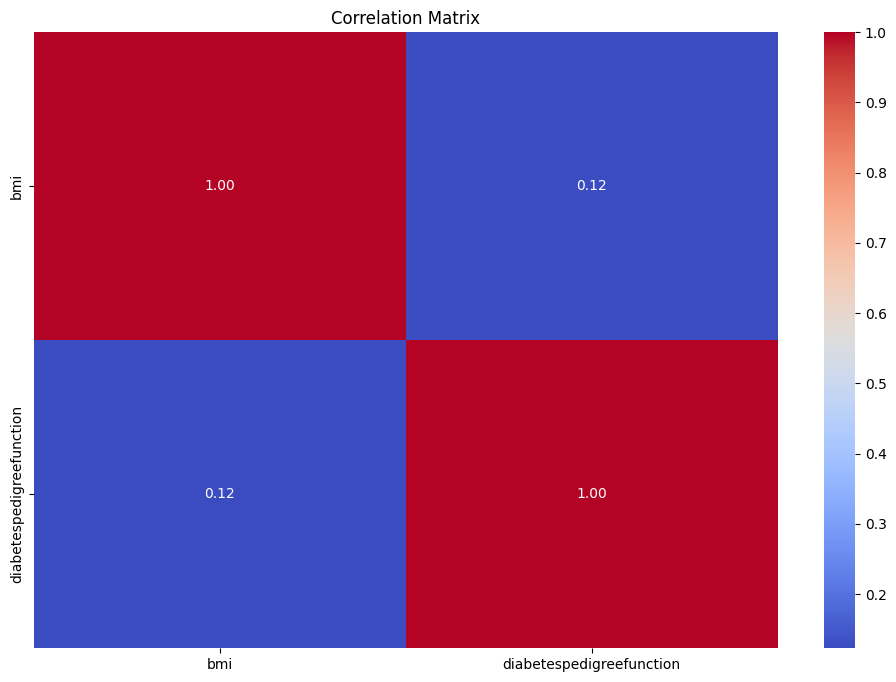

In [413]:
X_train_float = X_train.select_dtypes(include='float')

# Calculate Pearson correlation matrix
corr_matrix = X_train_float.corr(method='pearson')

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**4. Point-Biserial correlation**

In [414]:
from scipy.stats import pointbiserialr

# Example: Calculate Point-Biserial correlation between a numeric and a dummy variable
numeric_vars = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']
dummy_vars = ['age_category_middle_aged', 'age_category_senior', 'pregnancies_category_low', 'pregnancies_category_moderate', 'pregnancies_category_high']

point_biserial_results = pd.DataFrame(index=numeric_vars, columns=dummy_vars)

for num_var in numeric_vars:
    for dummy_var in dummy_vars:
        corr, _ = pointbiserialr(X_train[num_var], X_train[dummy_var])
        point_biserial_results.loc[num_var, dummy_var] = corr

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(point_biserial_results.astype(float), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Point-Biserial Correlation between Numeric and Dummy Variables")
plt.show()


KeyError: 'age_category_middle_aged'

**5. Eigenvalues and Condition Number**  

Condition Number: 13.13


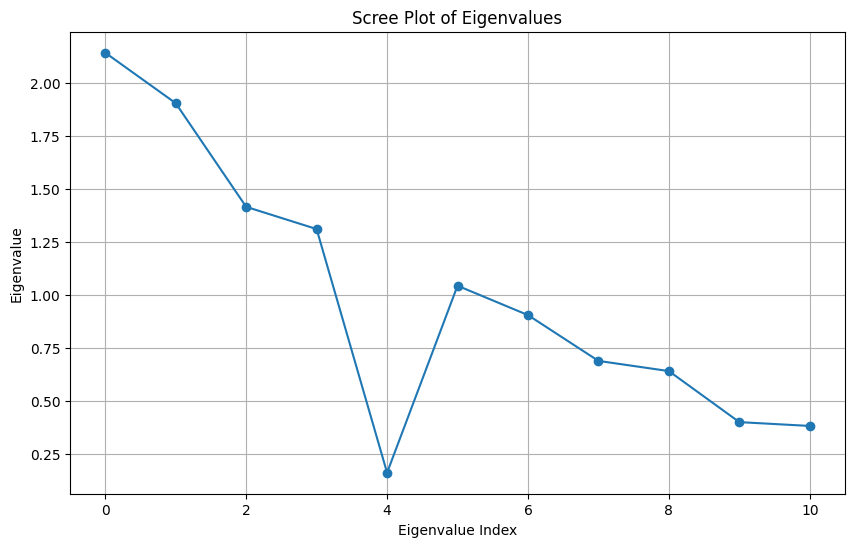

In [ ]:
X_train_eigen = X_train.copy()

# Check for NaN values
if X_train_eigen.isnull().sum().sum() > 0:
    print("NaN values found. Dropping rows with NaN values.")
    X_train_eigen = X_train_eigen.dropna()

# Check for Inf values
if np.isinf(X_train_eigen).sum().sum() > 0:
    print("Inf values found. Replacing Inf with NaN and dropping rows with NaN values.")
    X_train_eigen = X_train_eigen.replace([np.inf, -np.inf], np.nan)
    X_train_eigen = X_train_eigen.dropna()

# Check variance of each feature
if (X_train_eigen.var() == 0).any():
    print("Features with zero variance found. Dropping these features.")
    X_train_eigen = X_train_eigen.loc[:, X_train_eigen.var() > 0]

# Calculate eigenvalues and condition number
corr_matrix = X_train_eigen.corr()
eigenvalues = np.linalg.eigvals(corr_matrix)
condition_number = np.max(eigenvalues) / np.min(eigenvalues)
print(f"Condition Number: {condition_number:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(eigenvalues, 'o-')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

**6. Pair Plot for Dummy Variables**  

Visualize the relationships between dummy variables using a pair plot.   

Interpretation:

Look for patterns that indicate strong associations between dummy variables.

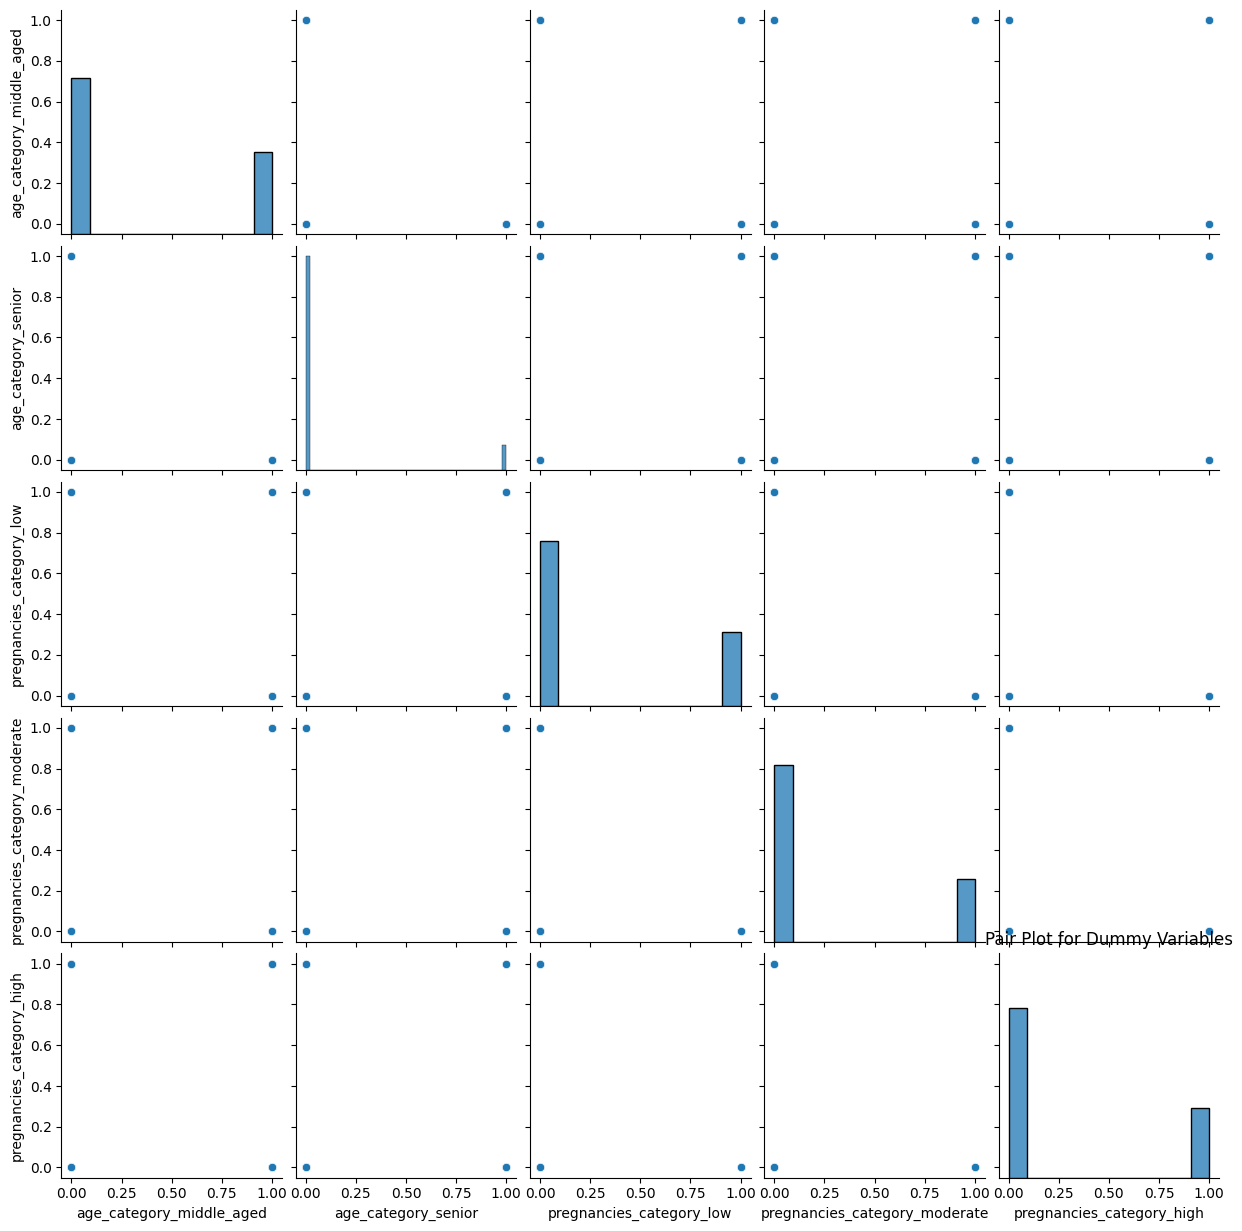

In [ ]:
# Pair plot for dummy variables
sns.pairplot(X_train[dummy_vars])
plt.title("Pair Plot for Dummy Variables")
plt.show()

**7. V-Cramer for categorical variables**

**Cramer's V** is a measure of association between two nominal variables, useful for assessing multicollinearity among dummy variables.  
It ranges from 0 (no association) to 1 (perfect association).  

Interpretation:

     age_category_middle_aged  age_category_senior  pregnancies_category_low  pregnancies_category_moderate  pregnancies_category_high
602                         0                    0                         1                              0                          0
429                         1                    0                         1                              0                          0
623                         0                    0                         0                              0                          0
209                         1                    0                         0                              0                          1
589                         0                    0                         0                              0                          0


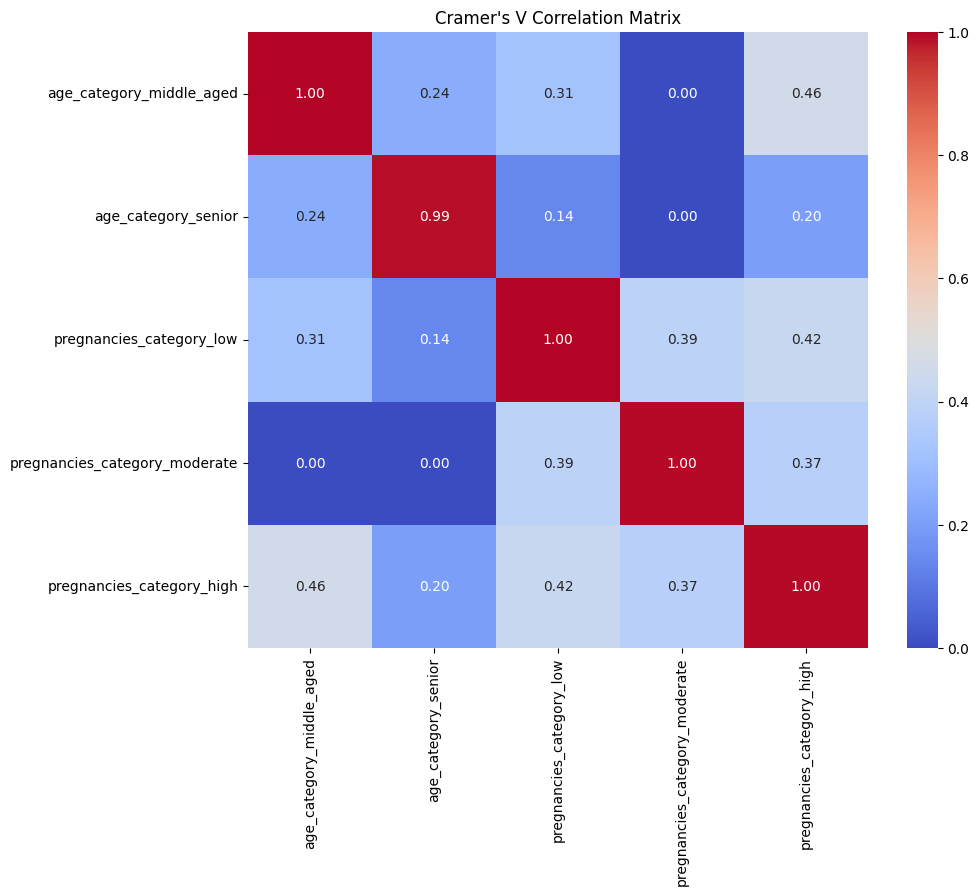

                               age_category_middle_aged  age_category_senior  pregnancies_category_low  pregnancies_category_moderate  pregnancies_category_high
age_category_middle_aged                       0.996392             0.241145                  0.314978                       0.000000                   0.456066
age_category_senior                            0.241145             0.991383                  0.137756                       0.000000                   0.200564
pregnancies_category_low                       0.314978             0.137756                  0.996172                       0.390097                   0.422312
pregnancies_category_moderate                  0.000000             0.000000                  0.390097                       0.995767                   0.374867
pregnancies_category_high                      0.456066             0.200564                  0.422312                       0.374867                   0.996051


In [ ]:
X_train_categ = X_train.select_dtypes(exclude='float')
print(X_train_categ.head().to_string())

categorical_columns = X_train_categ.columns.tolist()
cramersv_matrix = cramers_v_matrix(X_train_categ, categorical_columns)

plt.figure(figsize=(10, 8))
sns.heatmap(cramersv_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Cramer\'s V Correlation Matrix')
plt.show()
print(cramersv_matrix.to_string())

**8. Pearson correlation for dummy variables**

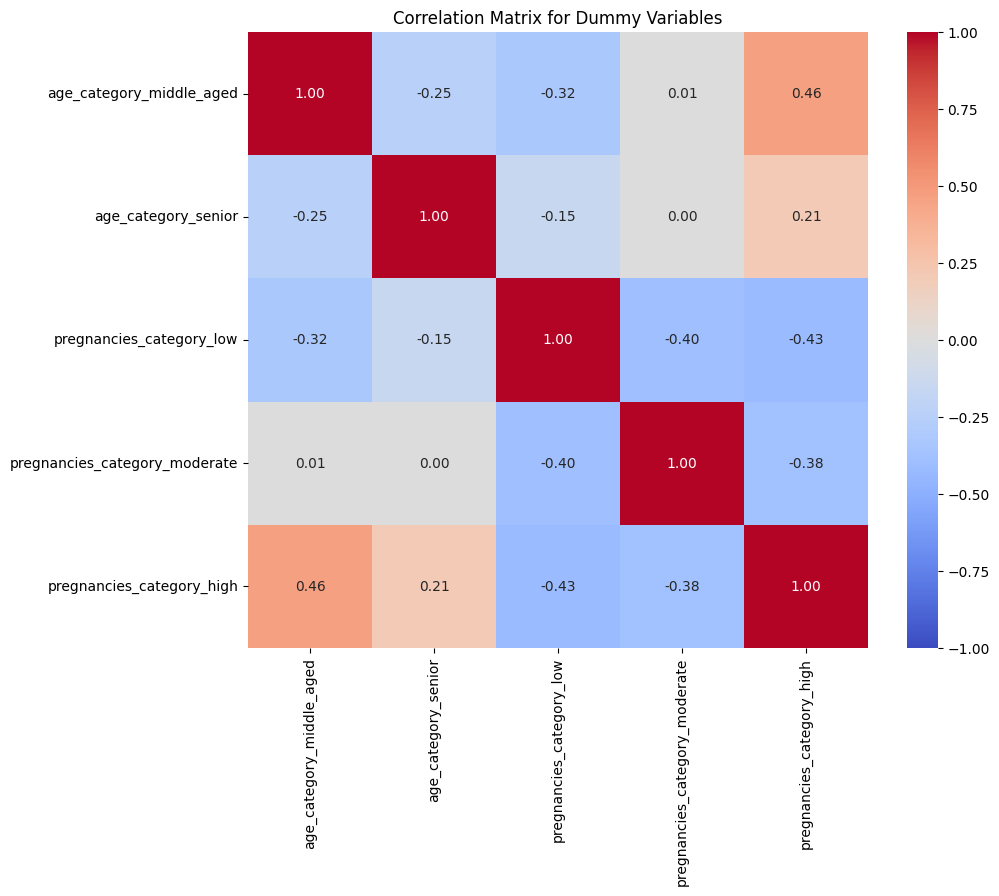

In [ ]:
# Calculate the correlation matrix for dummy variables
dummy_corr_matrix = X_train[categorical_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(dummy_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Dummy Variables")
plt.show()

#### **Fit the logistic regression model**

##### Logistic Regression with scipy

In [ ]:
from sklearn.model_selection import train_test_split

# Define X (mix of continuous and dummy variables) and y
X_train_dum = X_train.drop(columns=['outcome', 'pregnancies', 'age'])
X = sm.add_constant(X)  # Add a constant for the intercept
y = df_dummies['outcome']
X.head()

In [ ]:
import statsmodels.api as sm

# Add a constant for statsmodels (already done above, but included here for clarity)

# Logistic Regression
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467587
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      602
Method:                           MLE   Df Model:                           11
Date:                Sun, 19 Oct 2025   Pseudo R-squ.:                  0.2864
Time:                        19:25:56   Log-Likelihood:                -287.10
converged:                       True   LL-Null:                       -402.31
Covariance Type:            nonrobust   LLR p-value:                 3.452e-43
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -7.8714      0.875     -8.995      0.

In [ ]:
# Compute the odds ratios
odds_ratios = np.exp(result.params)
print("Odds Ratios:")
print(odds_ratios)

Odds Ratios:
const                            0.000381
glucose                          1.036720
bloodpressure                    0.985053
skinthickness                    1.005788
insulin                          0.887386
bmi                              1.093266
diabetespedigreefunction         1.744730
age_category_middle_aged         2.369158
age_category_senior              1.637534
pregnancies_category_low         1.089717
pregnancies_category_moderate    1.672058
pregnancies_category_high        2.245315
dtype: float64


#### **Linearity of Log-Odds**

Predicted Probabilities and Log-Odds:

* The linearity of log-odds assumption in logistic regression refers to the relationship between continuous predictors and the log-odds of the outcome.
* To assess this, you need the predicted probabilities from a fitted logistic regression model. These probabilities are then transformed into log-odds.  

Visual Inspection:

* You plot the continuous predictors against the predicted log-odds to visually inspect if the relationship is linear.
* If the relationship is not linear, you may need to transform the predictor (e.g., using polynomials, splines, or categorization).

In [ ]:
X_train.dtypes

const                            float64
glucose                          float64
bloodpressure                    float64
skinthickness                    float64
insulin                          float64
bmi                              float64
diabetespedigreefunction         float64
age_category_middle_aged           int64
age_category_senior                int64
pregnancies_category_low           int64
pregnancies_category_moderate      int64
pregnancies_category_high          int64
dtype: object

In [ ]:
# Compute the predicted probabilities
X_train['predicted_prob'] = result.predict(X_train)
X_train.head()

,const,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age_category_middle_aged,age_category_senior,pregnancies_category_low,pregnancies_category_moderate,pregnancies_category_high,predicted_prob
602,1.0,0.097192,74,36,-0.692891,27,0,0,0,1,0,0,0.150572
429,1.0,-0.810425,82,25,0.870031,35,0,1,0,1,0,0,0.172112
623,1.0,-0.841722,70,27,0.305642,43,0,0,0,0,0,0,0.170485
209,1.0,1.975021,84,33,-0.692891,35,0,1,0,0,0,1,0.928543
589,1.0,-1.498962,0,0,-0.692891,21,0,0,0,0,0,0,0.036140


##### Calculate Predicted Probabilities and Log-Odds

In [ ]:
# # Compute the predicted probabilities
# X_train['predicted_prob'] = result.predict(X_train_with_const)

# # Calculate predicted log-odds
# X_train['predicted_log_odds'] = np.log(X_train['predicted_prob'] / (1 - X_train['predicted_prob']))

In [ ]:
# X_train['predicted_log_odds'] = np.log(X_train['predicted_prob'] / (1 - X_train['predicted_prob']))

# # Plot log-odds vs each continuous predictor
# for predictor in ['pregnancies','glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']:
#     plt.figure(figsize=(8, 5))
#     plt.scatter(X_train[predictor], X_train['predicted_log_odds'], alpha=0.5)
#     plt.title(f'Log-Odds vs {predictor}')
#     plt.xlabel(predictor)
#     plt.ylabel('Log-Odds of Y=1')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.show()

##### Plot Log-Odds vs. Continuous Predictors

In [ ]:
# continuous_predictors = ['glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction']

# for predictor in continuous_predictors:
#     plt.figure(figsize=(8, 5))
#     plt.scatter(X_train[predictor], X_train['predicted_log_odds'], alpha=0.5)
#     plt.title(f'Log-Odds vs {predictor}')
#     plt.xlabel(predictor)
#     plt.ylabel('Log-Odds of Y=1')
#     plt.axhline(0, color='red', linestyle='--')
#     plt.grid(True)
#     plt.show()

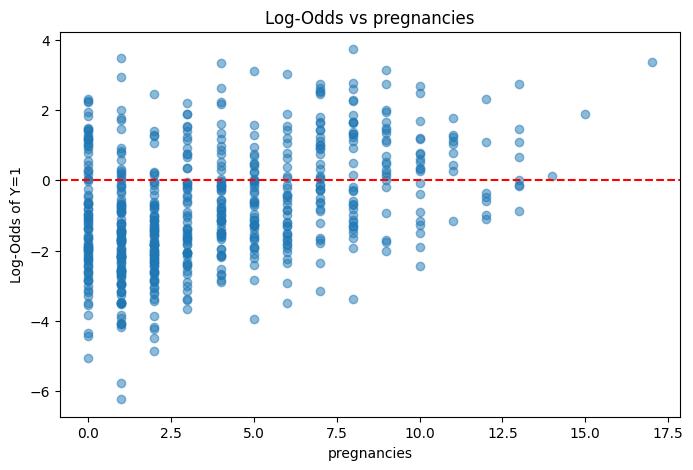

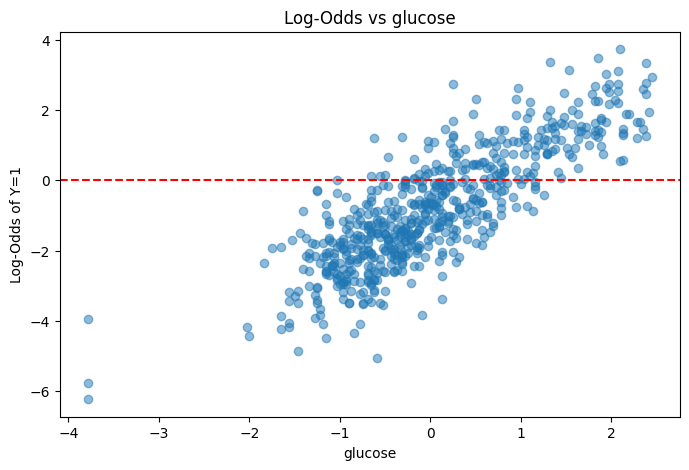

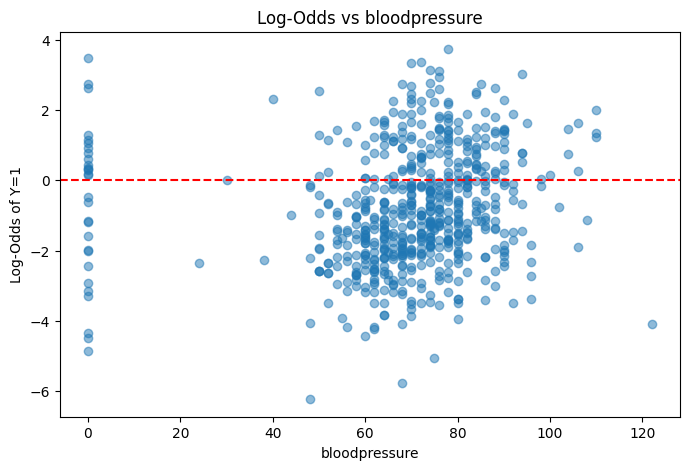

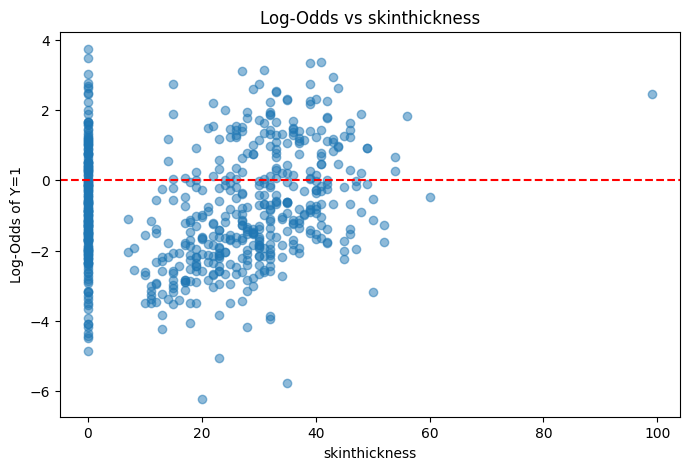

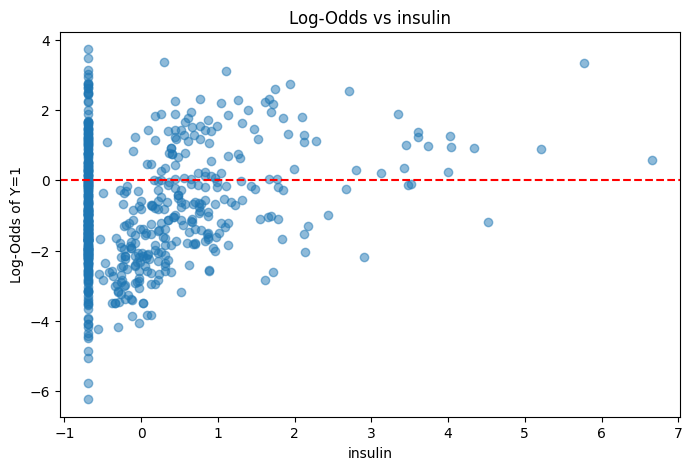

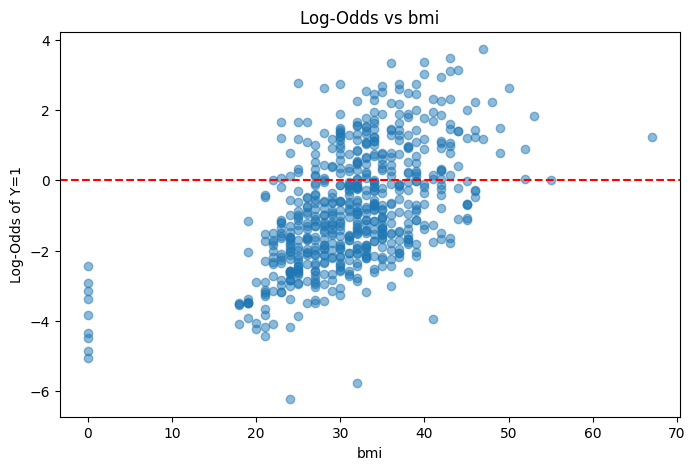

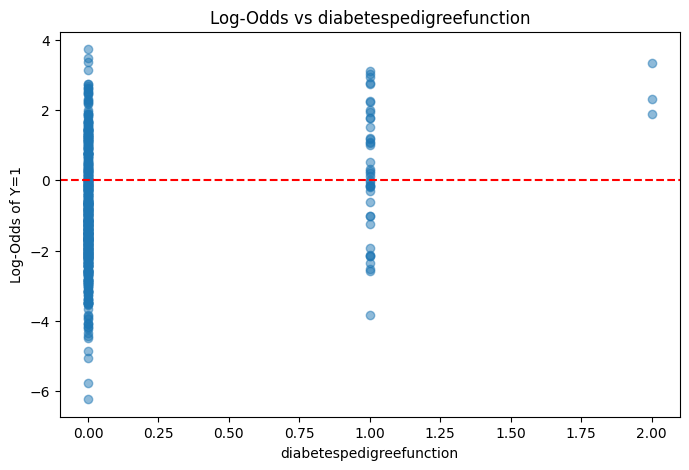

In [ ]:
# Check the hypothesis of linearity of log-odds for continuous predictors using plots.
import matplotlib.pyplot as plt
for predictor in ['pregnancies','glucose','bloodpressure','skinthickness','insulin','bmi','diabetespedigreefunction']:
    plt.figure(figsize=(8, 5))
    plt.scatter(X_train[predictor], np.log(X_train['predicted_prob'] / (1 - X_train['predicted_prob'])), alpha=0.5)
    plt.title(f'Log-Odds vs {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Log-Odds of Y=1')
    plt.axhline(0, color='red', linestyle='--')
    plt.show()

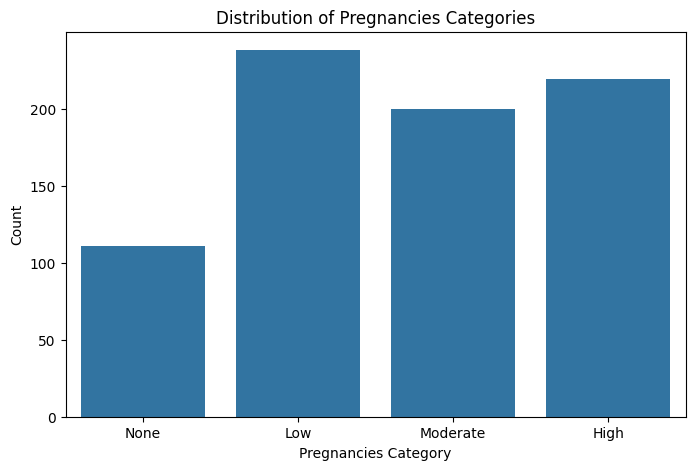

In [ ]:
# Visualize the distributio of the categories
plt.figure(figsize=(8, 5))
sns.countplot(x='pregnancies_category', data=df)
plt.title('Distribution of Pregnancies Categories')
plt.xlabel('Pregnancies Category')
plt.ylabel('Count')
plt.show()


**Example with categorical features**

* Dataset preparation

* Fit the logit model

* Check the hypothesis of linearity of log-odds for continuous predictors using plots.

In [ ]:
# Calculate predicted probabilities
data_dummies['predicted_prob'] = result.predict(X)

# Calculate predicted log-odds
data_dummies['predicted_log_odds'] = np.log(data_dummies['predicted_prob'] / (1 - data_dummies['predicted_prob']))

# Add the original category back for plotting
data_dummies['category'] = data['category']


## Coefficients interpretation

**The Odds**

The odds are defined by:  

$$\text{Odds} = \dfrac{p}{1-p}$$


$\text{Where} \quad p = P(target=1|X)$

>_If a student has a 3 in 4 chance of passing and a 1 in 4 chance of failing, their odds are '3 to 1':_ $\text{Odds} = \dfrac{3/4}{1/4}=3$  

* **Notation:**
$$\text{Odds}(Y=1|X=0)=\dfrac{P(Y=1|X=0)}{1-P(Y=1|X=0)}$$

### **The Odds Ratio**

The odds ratio comparing the **probability of $target=1$** between individuals with value $X$ and those without it.

$$\text{Odds Ratio} = \dfrac{\text{Odds}(Y=1|X=1)}{\text{Odds}(Y=1|X=0)}$$

$$\text{Odds Ratio} = \dfrac{P(Y_i=1 | X=1)}{1 - P(Y_i=1 | X=1)} / \dfrac{P(Y_i=1 | X=0)}{1 - P(Y_i=1 | X=0)}$$

We know that logit is given by:

$$\text{logit}(p) = \text{log}(\dfrac{p}{1-p}) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_k x_{ik}$$

### **Interpreting the Intercept**  

The intercept $\beta_0$​ represents the **log-odds of the outcome $Y=1$ when all predictors are equal to zero**.  
$\beta_0$​ defines the **baseline probability** of the outcome when all predictors are zero.  

⚠️ **Caveat**:  
This interpretation of $\beta_0$ is often not meaningful if some predictors cannot logically be zero (e.g., age=0, blood pressure). In such cases, $\beta_0$​ is primarily a mathematical component of the model and is rarely interpreted in isolation.  
  
  
* **Odds for the baseline group:**  

$$\text{Odds}(Y=1∣X_1=0)=\exp⁡(\beta_0)$$

* **Probability for the baseline group:**
$$P(Y=1∣X_1=0)=\dfrac{\exp⁡(\beta_0)}{1 + \exp(\beta_0)}$$


>If $X_1$​ is "smoking status" ($0$ = non-smoker, $1$ = smoker), then 
>* $\beta_0$​ gives the **log-odds** of the outcome for non-smokers  
>* $\exp(\beta_0)$ gives the **odds** of the outcome for non-smokers.  
>
>If $\beta_0 = -1$, then: $$\exp(\beta_0) = \exp(-1) \approx 0.37$$
>
>$$P(Y=1∣X_1=0)= \dfrac{0.37}{1 + 0.37} \approx 0.27$$
>
>27% of non-smokers are predicted to have the outcome (e.g., lung cancer), assuming no other predictors.  
>It is the observed proportion of lung cancer for non-smokers.  

### **Interpreting the Slope**

In a model with multiple predictors, each $\beta_i$​ (and its corresponding odds ratio $\exp(\beta_i)$ represents the effect of that predictor on the log-odds of $Y=1$, holding all other predictors constant.  
This is the key assumption of multivariable regression: ceteris paribus (all else being equal).

The coefficient $\beta_1$​ represents the **change in the log-odds of** $Y=1$ for a **one-unit change** in $X_1$​. The odds ratio $\exp(\beta_1)$​ quantifies how the odds of $Y=1$ change with $X_1$​.

**General Formula for Odds Ratio**

For any type of predictor $X_1$, the odds ratio for a one-unit increase is:  
$$\text{Odds Ratio} = \frac{\text{Odds}(Y=1 | X_1 = x+1)}{\text{Odds}(Y=1 | X_1 = x)} = \exp(\beta_1)$$

📌 **Note:**  
$\exp(\beta_1​)$ compares the odds of $Y=1$ between $X_1=1$ and $X_1=0$, controlling for all other variables in the model (all others features constant).

* Case: $X_1$ is Binary

For a binary predictor $X_1$​ (e.g., $0$ = non-smoker, $1$ = smoker), the odds ratio $\exp(\beta_1)$​ compares the odds of $Y=1$ between the two groups.

* **Logistic regression equation:**

$$\log\left(\dfrac{P(Y=1 | X_1)}{1 - P(Y=1 | X_1)}\right) = \beta_0 + \beta_1 1_{\{X_1 = 1\}}​$$

* **Odds ratio:**
$$\text{Odds Ratio} = \dfrac{P(Y=1 | X_1=1)}{1 - P(Y=1 | X_1=1)} / \dfrac{P(Y=1 | X_1=0)}{1 - P(Y=1 | X_1=0)} = \exp(\beta_1)$$

**Interpretation:**

* If $\exp(\beta_1) = 1$: No effect of the feature $X_1$​ on the odds of $Y=1$.
* If $\exp(\beta_1)>1$: The odds of $Y=1$ are higher when $X_1​=1$. The feature $X_1$​ is **positively associated** with the outcome.
* If $\exp(\beta_1) < 1$: The odds of $Y=1$ are lower when $X_1​=1$. The feature $X_1$​ is **negatively associated** with the outcome.

>**Example:**  
>If $\beta_1 = 0.7 \rightarrow \exp(\beta_1) \approx 2.01$. The odds of lung cancer for smokers $(X_1=1)$ are twice as high as for non-smokers $(X_1=0)$.

* Case: $X_1$ is Categorical

For a categorical predictor $X_1$ with more than two levels (e.g., color = red, green, blue), you use **dummy variables**. 

* **The logistic regression model becomes:**

$$\text{log}\left( \dfrac{P(Y=1)}{1 - P(Y=1)} \right) = \beta_0 + \beta_{green}1_{\{X_1 = \text{green}\}} + \beta_{blue}1_{\{X_1 = \text{blue}\}}$$

* **Reference Category ("red"):** When $1_{\{X_1 = \text{green}\}}=0$ and $1_{\{X_1 = \text{blue}\}}=0$, the log-odds are:

$$\text{log}\left( \dfrac{P(Y=1)}{1 - P(Y=1)} \right) = \beta_0$$

**Interpretation:** This means $\beta_0$​ represents the log-odds of $Y=1$ for the reference category ("red").

* **Category ("green"):** When $1_{\{X_1 = \text{green}\}}=1$ and $1_{\{X_1 = \text{blue}\}}=0$, the log-odds are:

$$\text{log}\left( \dfrac{P(Y=1)}{1 - P(Y=1)} \right) = \beta_0 + \beta_{green}$$

* **Category ("blue"):** When $1_{\{X_1 = \text{green}\}}=0$ and $1_{\{X_1 = \text{blue}\}}=1$, the log-odds are:

$$\text{log}\left( \dfrac{P(Y=1)}{1 - P(Y=1)} \right) = \beta_0 + \beta_{blue}$$

The **odds ratio for "blue" relative to the reference "red"** is:
$$\exp(\beta_{blue}) = \dfrac{\text{Odds}(Y=1 | \text{blue})}{\text{Odds}(Y=1 | \text{red})}$$

The same way, $\exp(\beta_{\text{green}})$​ compares the odds for "green" vs. the "red" reference.

>**Interpretation:**
>
>If $\exp(\beta_{\text{green}})​=1.5$, the odds of $Y=1$ are $1.5$ times higher for "green" compared to "red".

* ##### Case: $X_1$ is Quantitative

For a continuous predictor $X_1$ (e.g., age, blood pressure), the odds ratio $\exp(\beta_1)$​ represents the multiplicative change in the odds of $Y=1$ for a one-unit increase in $X_1$​.  

* **Logistic regression equation:**

$$\log\left(\dfrac{P(Y=1 | X_1)}{1 - P(Y=1 | X_1)}\right) = \beta_0 + \beta_1 X_1​$$

* **Odds ratio for a one-unit increase:**

$$\text{Odds Ratio} = \frac{\text{Odds}(Y=1 | X_1 = x+1)}{\text{Odds}(Y=1 | X_1 = x)} = \exp(\beta_1)​$$

**In short**: $\beta_1$​ captures the **constant log-odds** change per unit increase in $X_1$, so $\exp(\beta_1)$​ is the **odds ratio** for that one-unit change.

This holds regardless of the starting value of $X_1$​ because the model assumes a constant multiplicative effect on the odds (a key assumption of logistic regression).


>**Interpretation:**
>
>* If $\beta_1=0.095 \rightarrow \exp(\beta_1)=1.1$, the odds of $Y=1$ increase by 10% for each one-unit increase in $X_1$​.
>* If $X_1$​ is "years of smoking" and $\beta_1 = 0.7 \rightarrow  \exp(\beta_1) \approx 2.01$. For each additional year of smoking, the odds of lung cancer double.
>.

**Summary**

| Type of $X_1$         | Interpretation of $\exp(\beta_1)$                                       |
|-----------------------|-------------------------------------------------------------------------|
| Binary                | Compares odds of $Y=1$ between $X_1=1$ and $X_1=0$                      |
| Categorical           | Compares odds of $Y=1$ for a given category relative to the reference.  |
| Quantitative          | Multiplicative change in odds of $Y=1$ for a one-unit increase in $X_1$ |


In [ ]:
# Calculate predicted probabilities
diabetes_dummies['predicted_prob'] = result.predict(X)

# Calculate predicted log-odds
diabetes_dummies['predicted_log_odds'] = np.log(diabetes_dummies['predicted_prob'] / (1 - diabetes_dummies['predicted_prob']))


In [ ]:
# Plot the log-odds for each age category
plt.figure(figsize=(8, 6))
sns.boxplot(x='age_category', y='predicted_log_odds', data=diabetes_dummies)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Log-Odds by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Predicted Log-Odds')
plt.show()

In [ ]:
# Plot the log-odds for each glucose category
plt.figure(figsize=(8, 6))
sns.boxplot(x='glucose_category', y='predicted_log_odds', data=diabetes_dummies)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Log-Odds by Glucose Category')
plt.xlabel('Glucose Category')
plt.ylabel('Predicted Log-Odds')
plt.show()

6. Interpretation of the Plots

* Consistency of Log-Odds: The boxplot will show the distribution of predicted log-odds for each category. If the medians of the log-odds for each category are distinct, it suggests that the categorical predictor is having an effect on the log-odds of the outcome.

* Effect of Categories: The difference in log-odds between categories should reflect the coefficients in the logistic regression output.

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
odds_ratios = np.exp(result.params)
print(odds_ratios)

const                       0.000218
pregnancies                 1.174037
glucose                     1.038217
bloodpressure               0.986439
skinthickness               1.003852
insulin                     0.998607
bmi                         1.089609
diabetespedigreefunction    2.732962
age                         1.006341
dtype: float64


**Interpreting the coefficients:**

For each feature, the exponentiated coefficient (exp(coef)) represents the change in odds for a one-unit increase in that feature, holding all other features constant.

For example, has the coefficient for 'pregnancies' is 0.1604, the odds ratio is exp(0.1604) ≈ 1.174037.  
This means that for each one-unit increase in pregnancies, the odds of the outcome occurring (e.g., having diabetes) increase by approximately 17.4%, assuming all other features remain constant.


**Diabetes Prediction: data preparation & model inference**

* Preparing new input data for prediction

In [ ]:
# check the number of features in the model
print(f'Number of features in the model: {len(result.params)}')

Number of features in the model: 9


In [ ]:
# Predictive system

input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# to numpy array
input_data_array = np.asarray(input_data)

# Reshape
input_data_reshape = input_data_array.reshape(1, -1)
print("Shape of input data:", input_data_reshape.shape)

# Standardized the data
input_data_std = scaler.transform(input_data_reshape)
print("Shape of standardized input data:", input_data_std.shape)

Shape of input data: (1, 8)
Shape of standardized input data: (1, 8)


In [ ]:
# Add a column of 1s for the intercept
input_data_with_const = np.hstack((np.ones((1, 1)), input_data_std))
print("Shape of input data with constant:", input_data_with_const.shape)

Shape of input data with constant: (1, 9)


* Using the model to make a prediction

In [ ]:
# Make prediction
pred = result.predict(input_data_with_const)
print(f'Predicted probability of diabetes: {pred[0]}')

Predicted probability of diabetes: 0.00032363072678058075


In [ ]:
# For binary classification, use a threshold (e.g., 0.5)
if pred[0] > 0.5:
    print('The person is diabetic')
else:
    print('The person is not diabetic')

The person is not diabetic


- Transform continuous to categorical

In [ ]:
import pandas as pd
import numpy as np

def continuous_to_categorical(df, column, bins, labels):
    """
    Transform a continuous variable into a categorical variable using binning.

    Parameters:
    - df: DataFrame containing the data.
    - column: Name of the column to transform.
    - bins: List of bin edges.
    - labels: List of labels for the bins.

    Returns:
    - DataFrame with the new categorical column.
    """
    df[f'{column}_category'] = pd.cut(df[column], bins=bins, labels=labels, include_lowest=True)
    return df

In [ ]:
# Tranform 'age' to categorical
bins_age = [20, 30, 50, 100]  # Define bin edges for age
labels_age = ['Young', 'Middle-aged', 'Senior']  # Define labels for age categories
diabetes_df = continuous_to_categorical(diabetes_df, 'age', bins_age, labels_age)

# Transform 'glucose' to categorical
bins_glucose = [0, 100, 125, 200]  # Define bin edges for glucose
labels_glucose = ['Low', 'Normal', 'High']  # Define labels for glucose categories
diabetes_df = continuous_to_categorical(diabetes_df, 'glucose', bins_glucose, labels_glucose)

## APPENDIX

### Interpreting the coefficients

**Demonstration:** The coefficient $\beta_1$​ represents the **change in the log-odds of** $Y=1$ for a **one-unit change** in $X_1$​ quantitative feature.  

Notations:  
$$\text{Odds}(Y=1|X=x+1)=P(Y=1|X=x+1) / (1-P(Y=1|X=x+1))$$

$$\text{Odds}(Y=1|X=x)=P(Y=1|X=x) / (1-P(Y=1|X=x))$$

We know that:  

$$\text{log(Odds)}(Y=1|X=x+1)=\beta_0 + \beta_1 \times (x+1)$$

$$\text{log(Odds)}(Y=1|X=x)=\beta_0 + \beta_1 \times x$$

By difference:

$$\text{log(Odds)}(Y=1|X=x+1) - \text{log(Odds)}(Y=1|X=x) =\beta_0 + \beta_1 \times (x+1) - (\beta_0 + \beta_1 \times x) = \beta_1$$

$$\text{log}\left(\dfrac{\text{Odds}(Y=1|X=x+1)}{\text{Odds}(Y=1|X=x)}\right) =\beta_1$$

**CQFD**

Note:  

$$\dfrac{\text{Odds}(Y=1|X=x+1)}{\text{Odds}(Y=1|X=x)} = \exp(\beta_1)$$

### Model formulation

The prediction $y_i=1$ of the logistic regression is defined:

$$\hat{y_i} = P(y_i=1 | x_i; \theta) = \frac{1}{1 + \exp(-\theta^Tx_i)} = h_{\theta}(x_i)$$

* If $y_i=1$, then $P(y_i|x_i; \theta)=P(y_i=1|x_i; \theta)$
* If $y_i=0$, then $P(y_i|x_i; \theta)=P(y_i=0|x_i; \theta) = 1 - P(y_i=1|x_i; \theta)$

We can write these two equations into a single one:  

$$P(y_i|x_i; \theta)=P(y_i=1|x_i; \theta)^{y_i}\times (1 - P(y_i=1|x_i; \theta))^{1-y_i}$$

With the notations:

$$P(y_i|x_i; \theta)=h_{\theta}(x_i)^{y_i}\times (1 - h_{\theta}(x_i))^{1-y_i}$$


### Likelihood function

The **likelihood** of the observations $y_i$ given the inputs $x_i$ and parameters $\theta$ is defined as:  

$$L(\theta) = \prod_{i=1}^n P(y_i|x_i;\theta) = \prod_{i=1}^n (h_{\theta}(x_i))^{y_i} (1 -h_{\theta}(x_i))^{1-y_i}$$

where the prediction of the logistic regression is defined:

$$h_{\theta}(x_i) = P(y_i=1 | x_i; \theta) = \frac{1}{1 + \exp(-\theta^Tx_i)}$$

The **log-likelihood** is defined as:  

$$l(\theta) = \log(L(\theta))=\sum_{i=1}^n[y_i \log (h_{\theta}(x_i)) + (1 - y_i) \log(1 - h_{\theta}(x_i))]$$

### Objective of Logistic Regession

The goal of learning a **logistic regression model** is to **minimize the cost function** by adjusting the parameters $\theta$.The cost function measures the average prediction error across all $n$ training samples.

### Cost function (general definition)

The cost function $J(\theta)$ is defined as the average penalty for prediction errors across the training set. Mathematically, it is expressed as:

$$J(θ) = -\frac{1}{n} \sum cost(h_\theta(x_i), y_i)$$

where:

* $h_\theta(x_i)$ the model's prediction for sample $x_i$
* $y_i$ the observed (true) value.

Alternatively, it can be written as:

$$J(θ) = \frac{1}{n} \sum cost(\hat{y_i}, y_i)$$

Where:

* $\hat{y_i} = h_{\theta}(x_i)$

### Cost function **log loss**

For logistic regression, the cost function is called **log loss** (or logistic loss).  
**Log loss** is derived from the log-likelihood $l(\theta)$ and is defined as:

$$J(\theta) = -\dfrac{1}{n}l(\theta) = -\frac{1}{n} \sum(y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)))$$


#### How Log-Loss penalizes prediction errors

The log-loss function penalizes prediction errors based on the estimated probability from the model. It assigns higher penalties when predictions are far from the true labels—specifically:

- If the label $y_i = 1$ (positive class), the penalty is $-log(h_{\theta}(x_i))$. The closer $h_{\theta}(x_i)$ is to 0 (far from the true label), the higher the penalty ($-\log(0^+) \approx + \infty$).  

- If the label $y_i = 0$ (negative class), the penalty is $-log(1-h_{\theta}(x_i))$, the closer $h_{\theta}(x_i)$ is to 1 (far from the true label), the higher the penalty ($-\log(1 -1^+) \approx + \infty$).  

The two cases are combined into a single formula for observation $i$:
$$y_i log(h_\theta(x_i)) + (1 - y_i) log(1 - h_\theta(x_i))$$


**Key insights:**

* **Log loss** evaluates how well the model fits the training data.
* The log loss is the negative average the log likelihood.
* **Higher likelihood** leads to **lower log loss** (since $J(\theta) = -\frac{1}{n}l(\theta)$).
* The log-loss function heavily penalizes confident wrong predictions.

### Optimizing the parameters

By minimizing the cost function $J(\theta)$, we aim to find the parameters $\theta$ that maximize the likelihood of observing the training data given the model parameters.  

To achieve this, we use an iterative optimization method, **gradient descent**, to find the values of $\theta$ that minimize the cost function over the training set:

$$\underset{\theta}{minimize}(J(\theta))$$

### Parameter estimation methods

#### Gradient Descent

The gradient descent only uses the **gradient** (first derivative) of the cost function to update the parameters $\theta$ in the opposite direction of the gradient, scaled by a learning rate $\alpha$.  

To compute the gradient $\nabla J(\theta)$ we start by transforming the expression of:

$$\log(h_\theta(x_i)) = \log\left(\frac{1}{1 + \exp(-\theta^Tx_i)}\right) = -\log(1 + \exp(-\theta^Tx_i))$$

And:  

$$\log(1 - h_\theta(x_i)) = \log\left(1 - \frac{1}{1 + \exp(-\theta^Tx_i)}\right)$$

$$\log(1 - h_\theta(x_i)) = \log\left(\frac{1 + \exp(-\theta^Tx_i) - 1}{1 + \exp(-\theta^Tx_i)}\right)$$

$$\log(1 - h_\theta(x_i)) = \log\left(\frac{\exp(-\theta^Tx_i)}{1 + \exp(-\theta^Tx_i)}\right)$$

$$\log(1 - h_\theta(x_i)) = \log(\exp(-\theta^Tx_i)) - \log({1 + \exp(-\theta^Tx_i)})$$

$$\log(1 - h_\theta(x_i)) = -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)})$$

We integrate these modifications:  

$$J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) + (1 - y_i) (-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}))]$$

$$J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) + (1 - y_i) (-\theta^Tx_i - \log(1 + exp(-\theta^Tx_i)))]$$

$$J(\theta) = -\frac{1}{n} \sum[y_i (-\log(1 + \exp(-\theta^Tx_i))) -\theta^Tx_i - \log(1 + \exp(-\theta^Tx_i)) + y_i \theta^Tx_i  + y_i \log(1 + \exp(-\theta^Tx_i))]$$

$$J(\theta) = -\frac{1}{n} \sum[- y_i \log(1 + \exp(-\theta^Tx_i)) -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  + y_i \log(1 + \exp(-\theta^Tx_i))]$$

$$J(\theta) = -\frac{1}{n} \sum[\cancel{- y_i \log(1 + \exp(-\theta^Tx_i))} -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  + \cancel{y_i \log(1 + \exp(-\theta^Tx_i))}]$$

$$J(\theta) = -\frac{1}{n} \sum[-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) + y_i \theta^Tx_i  ]$$

$$J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) ]$$

with:

$$-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) = - \log(\exp(\theta^T x_i)) - \log(1 + \exp(-\theta^Tx_i))$$

$$-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) = -(\log(\exp(\theta^T x_i)) + \log(1 + \exp(-\theta^Tx_i)))$$

$$-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) = -\log[\exp(\theta^T x_i)(1 + \exp(-\theta^Tx_i))]$$

$$-\theta^Tx_i - \log({1 + \exp(-\theta^Tx_i)}) = -\log(\exp(\theta^T x_i) + 1)$$

$$J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\log(\exp(\theta^T x_i + 1)) ]$$

$$J(\theta) = -\frac{1}{n} \sum[y_i \theta^Tx_i  -\log(1 + \exp(\theta^T x_i)) ]$$

$$\frac{\partial}{\partial \theta_j}J(\theta) = -\frac{1}{n} \sum[y_i \frac{\partial}{\partial \theta_j} (\theta^Tx_i)  - \frac{\partial}{\partial \theta_j}\log(1 + \exp(\theta^T x_i)) ]$$

Knowing that:

$$\theta^Tx_i = \theta_1 {x_i}^{(1)} + \theta_2 {x_i}^{(2)} + \ldots + \theta_k {x_i}^{(k)}$$

$$\frac{\partial}{\partial \theta_j} (\theta^Tx_i) = x_i^{(j)}$$
$$\dfrac{\partial}{\partial \theta_j}\left(\log(1 + \exp(\theta^T x_i))\right) \underset{\log(u)^{'} = \dfrac{u^{'}}{u}} = \dfrac{\dfrac{\partial}{\partial \theta_j}(1 + \exp(\theta^T x_i))} {1 + \exp(\theta x_i)}$$

And:  

$$\dfrac{\partial}{\partial \theta_j}\left(\log(1 + \exp(\theta^T x_i))\right) \underset{\log(u)^{'} = \dfrac{u^{'}}{u}} = \dfrac{\dfrac{\partial}{\partial \theta_j}(1 + \exp(\theta^T x_i))} {1 + \exp(\theta x_i)}$$
$$\dfrac{\dfrac{\partial}{\partial \theta_j}(1 + \exp(\theta^T x_i))} {1 + \exp(\theta x_i)} = \dfrac{\dfrac{\partial}{\partial \theta_j}(\exp(\theta^T x_i))} {1 + \exp(\theta x_i)}$$
$$\dfrac{\dfrac{\partial}{\partial \theta_j}(\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} \underset{\exp(u)^{'} = u^{'}\exp(u)} =  \dfrac{\dfrac{\partial}{\partial \theta_j}(\theta^T x_i) * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)}$$
$$\dfrac{\dfrac{\partial}{\partial \theta_j}(\theta^T x_i) * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} = \frac{x_i^{(j)} * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)}$$
$$\dfrac{x_i^{(j)} * (\exp(\theta^T x_i))} {1 + \exp(\theta x_i)} = x_i^{(j)} * h_\theta(x_i)$$
$$\dfrac{\partial}{\partial \theta_j}J(\theta) = -\dfrac{1}{n} \sum[y_i x_i^{(j)}  - x_i^{(j)} h_\theta(x_i)]$$

$$-\dfrac{1}{n} \sum[y_i x_i^{(j)}  - x_i^{(j)} h_\theta(x_i)] = -\dfrac{1}{n} \sum[y_i - h_\theta(x_i) ] x_i^{(j)}$$

$$\frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{n} \sum[h_\theta(x_i) - y_i ] x_i^{(j)}$$

We know that the expression of the Gradient descent to update the weights is for the weight $\theta_j$ :  

$$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$

$$\theta_j = \theta_j - \frac{\alpha}{n} \sum[h_\theta(x_i) - y_i ] x_i^{(j)}$$

#### The Newton-Raphson algorithm

Others algorithms can be used to find the coefficients of the logistic regression. The Newton-Raphson algorithm is an alternative to the gradient descent.

The Newton-Raphson method uses both the first derivative (gradient) and the second derivative (Hessian) of the cost function. It approximates the cost function as a quadratic form and finds the minimum of this approximation.  

**Update rule**

$$\theta = \theta - H^{-1} \nabla J(\theta)$$

Logistic regression is a regression model used to predict the probability of a binary event based on one or more predictive variables. In logistic regression, the likelihood function is convex and can be maximized using the Newton-Raphson algorithm.  

The Newton-Raphson algorithm is an iterative method for finding the maximum of a function using its first and second derivatives. For logistic regression, the likelihood function is given by:

$L(\theta | X, y) = \prod(P(yi | x_i, \theta)^{yi} (1 - P(y_i | x_i, \theta))^{(1 - y_i)})$

where: 
* $\theta$ is the vector of logistic regression coefficients, 
* $X$ is the matrix of predictive variables, 
* $y$ is the vector of binary response variables, and
* $P(y_i | x_i, \theta)$ is the predicted probability of the binary event for observation $i$.

To maximize the likelihood function, the Newton-Raphson algorithm updates the coefficient vector $\theta$ at each iteration using the following formula:


$\theta_{i+1} = \theta_i - H^{-1} . g$  

where  

- $H = \dfrac{\partial^2L}{\partial \theta \partial\theta'}$ is the Hessian matrix of the likelihood function.  

- $g = \dfrac{\partial L}{\partial \theta }$ is the gradient vector of the likelihood function, and,  

- $\theta_i$ is the coefficient vector at iteration $i$. 

The Hessian matrix and gradient vector of the likelihood function are computed using the partial derivatives of the likelihood with respect to the coefficients $\theta$.  

Thus, in logistic regression, the Newton-Raphson algorithm is used to estimate the coefficients by maximizing the likelihood function. This allows the prediction of binary event probabilities based on the predictive variables.  

**Note**: The iterations stop when the difference between two successive solution vectors becomes negligible.

### Convexity

Convexity is a crucial property in optimization, as it ensures that any local minimum is also a global minimum. This makes it easier to find the optimal solution using methods like gradient descent.  

The Log Loss function is convex due to its logarithmic form, which is always convex for positive values. While convexity guarantees that a stationary point (where the derivative is zero) is a global minimum, it does not guarantee the existence of such a point.  

To prove the existence of a minimum, the function must also be bounded below and attain this lower bound. For Log Loss, the function is bounded below by zero (since the logarithm of a positive number is always defined) and reaches this bound when predictions are perfectly accurate (i.e., the predicted probability for the correct class is 1).  

Combining convexity with the fact that Log Loss is bounded below and attains its lower bound, we conclude that the function reaches a global minimum when predictions are perfectly correct.

Another way to compute the coefficients

### Logistic Regression from scratch with Gradient Descent

#### The Algorithm steps


Note: $\theta = (w,b)$   

with $h_\theta(x) = \frac{1}{1 + \exp(-w x + b)}$

#### Training


- Initialize weights as zero
- Initialize bias as zero

#### Given a data point

- Predict result by using $\hat{y} = \frac{1}{1 + \exp(-wx+b)}$
- Calculate the error
- Use Gradient descent to figure out new weights and bias values
- Repeat n times

In [ ]:
class Logistic_Regression:
    
    def __init__(self, learning_rate=0.01, n_iter=1000):
        '''Initiate the constructor
            INPUT:
                learning_rate: magnitude of the step
                n_iter: number of iterations
        '''
        self.learning_rate = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        '''Train the model
        INPUTS:
            X: the dataset of the features
            y: the target
        OUTPUTS:
            The model
        '''

        self.n_samples, self.n_features = X.shape
        
        # initialize the parameters:
        self.weights = np.zeros(self.n_features)
        self.bias = 0

        self.X = X
        self.y = y

        for _ in range(self.n_iter):
            return self.update_weights()

    def update_weights(self):
        '''Update of the weights with Gradient descent'''

        # we compute the prediction (the probability)
        y_pred = 1 / (1 + np.exp( - (np.dot(self.X, self.weights) + self.bias)))

        # update the weights:
        # w_j = w_j - (alpha / n) * S(p_hat - y_i)xij
        # b = b - (alpha / n) * S(p_hat - y_i)
        dw = (1 / self.n_samples) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.n_samples) * np.sum(y_pred - self.y)

        self.weights = self.weights - self.learning_rate*dw
        self.bias = self.bias - self.learning_rate*db

    def predict(self, X):
        y_pred = 1 / (1 + np.exp( - (X.dot(self.weights) + self.bias)))
        y_pred = np.where(y_pred > 0.5 , 1 , 0)
        return y_pred

    

#### Testing

**Load the dataset**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
df = datasets.load_breast_cancer()
X, y = df.data, df.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = sum(y_true==y_pred)/len(y_true)
    return accuracy

**Fit the model**

In [ ]:
classifier = Logistic_Regression(learning_rate=0.01, n_iter=1000)

In [ ]:
classifier.fit(X_train, y_train)

**Assess the model**

In [ ]:
# Accuracy

from sklearn.metrics import accuracy_score

In [ ]:
# Accuracy on the training data
y_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_train_pred)
training_data_accuracy

0.3544600938967136

In [ ]:
# Accuracy on the training data
y_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_test_pred)
test_data_accuracy

0.42657342657342656

Given a data point:  
- Put the values from the data point into the equation $\hat{y} = \frac{1}{1 + \exp(-w+b)}$
- Choose the label based on the probability

In [ ]:
X_train[:5,:]

array([[1.616e+01, 2.154e+01, 1.062e+02, 8.098e+02, 1.008e-01, 1.284e-01,
        1.043e-01, 5.613e-02, 2.160e-01, 5.891e-02, 4.332e-01, 1.265e+00,
        2.844e+00, 4.368e+01, 4.877e-03, 1.952e-02, 2.219e-02, 9.231e-03,
        1.535e-02, 2.373e-03, 1.947e+01, 3.168e+01, 1.297e+02, 1.175e+03,
        1.395e-01, 3.055e-01, 2.992e-01, 1.312e-01, 3.480e-01, 7.619e-02],
       [1.195e+01, 1.496e+01, 7.723e+01, 4.267e+02, 1.158e-01, 1.206e-01,
        1.171e-02, 1.787e-02, 2.459e-01, 6.581e-02, 3.610e-01, 1.050e+00,
        2.455e+00, 2.665e+01, 5.800e-03, 2.417e-02, 7.816e-03, 1.052e-02,
        2.734e-02, 3.114e-03, 1.281e+01, 1.772e+01, 8.309e+01, 4.962e+02,
        1.293e-01, 1.885e-01, 3.122e-02, 4.766e-02, 3.124e-01, 7.590e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, 5.567e+02, 1.106e-01, 1.469e-01,
        1.445e-01, 8.172e-02, 2.116e-01, 7.325e-02, 3.906e-01, 9.306e-01,
        3.093e+00, 3.367e+01, 5.414e-03, 2.265e-02, 3.452e-02, 1.334e-02,
        1.705e-02, 4.005e-03, 1.641e

In [ ]:
clf = Logistic_Regression(learning_rate=0.0001)
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)

In [ ]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy(y_test, predictions)

0.3986013986013986

The inputs:

$$X=\begin{pmatrix} x_{1,1} & \ldots & x_{1,k} \\ x_{2,1} & \ldots & x_{2,k} \\ \ldots & x_{i,j} & \ldots \\ x_{n,1} & \ldots & x_{n,k} \end{pmatrix}, w=\begin{pmatrix} w_1 \\ w_2 \\ \ldots \\ w_k \end{pmatrix}, b = \text{constant}$$

The linear model:

$$X.w + b = \begin{pmatrix} x_{1,1} & \ldots & x_{1,k} \\ x_{2,1} & \ldots & x_{2,k} \\ \ldots & x_{i,j} & \ldots \\ x_{n,1} & \ldots & x_{n,k} \end{pmatrix}.\begin{pmatrix} w_1 \\ w_2 \\ \ldots \\ w_k \end{pmatrix} + b = \begin{pmatrix} x_{1,1}w_1 + & \ldots & + x_{1,k}w_k + b \\ x_{2,1}w_1 + & \ldots & + x_{2,k}w_k + b \\ \ldots & \ldots &   \ldots \\ x_{n,1}w_1 + & \ldots & + x_{n,k}w_k + b \end{pmatrix}$$

The model prediction (output) is given by:

$$\text{sigmoid}(X.w+b) = \frac{1}{1 + \exp(-X.w+b)}= \hat{p} = h_\omega(X)$$

The updates of the weights and bias are given by:

$$\omega_j = \omega_j - \frac{\alpha}{n} \sum[h_\omega(x_i) - y_i ] x_{i,j}$$

$$b = b - \frac{\alpha}{n} \sum[h_\omega(x_i) - y_i ]$$

For $\omega$ using linear algebra formula:

$$\omega = X^t.(\hat{p} - y) = \begin{pmatrix} x_{1,1} & \ldots & x_{1,n} \\ x_{2,1} & \ldots & x_{2,n} \\ \ldots & x_{i,j} & \ldots \\ x_{k,1} & \ldots & x_{k,n} \end{pmatrix}.\begin{pmatrix} \hat{p_1} - y_1 \\ \hat{p_2} - y_2 \\ \ldots \\ \hat{p_n} - y_n \end{pmatrix}$$

For $b$ using linear algebra formula:

$$b = \sum(\hat{p} - y) = \sum\begin{pmatrix} \hat{p_1} - y_1 \\ \hat{p_2} - y_2 \\ \ldots \\ \hat{p_n} - y_n \end{pmatrix}$$

The weights and bias are given by:

$$\text{sigmoid}(X.w+b) = \frac{1}{1 + \exp(-X.w+b)}= \hat{p}$$

In [ ]:
# The Logistic Regression from scratch

## Coefficients significativity

The Wald statistic allows to test the coefficients significativity $\hat{w_j}$. Wald statistic is given by::    

$(\frac{\hat{w_j}}{\sigma(\hat{w_j})})^2$  

Under $H_0 : \{\hat{w_j} = 0 \} \Longrightarrow \frac{\hat{w_j}}{\sigma(\hat{w_j})} $ ~ $\mathcal{N}(0, 1)$

The added-value of the variable $X_j$ is only real if the Wald statistic > 4 $(3.84 = 1.96^2)$

$Wald > 4$    

$\iff (\frac{\hat{w_j}}{\sigma(\hat{w_j})})^2 > 4$  

$\iff \frac{\hat{w_j}}{\sigma(\hat{w_j})} > 2$  

$\iff \hat{w_j} > 2\sigma(\hat{w_j}) $  

$\iff \hat{w_j} - 2\sigma(\hat{w_j}) > 0$  

$\iff \hat{w_j}$ se trouve à plus de 2 écarts-type de 0  

$\iff $ l'intervalle de confiance de $\hat{w_j}$ ne contient pas 0 à 95%  

CQFD

## Model quality mesure (Deviance)

Cf. S.Tufféry p.315

$n:$ number of observations  
$k:$ number of features

$L(\omega_k)$ Likelihood of the "modèle ajusté"  

$L(\omega_0)$ Likelihood of the "modèle réduit à la constante"  

$L(\omega_{max})$ Likelihood of the "modèle saturé". The one the model will compare.  


The Deviance formula:  

$D(\omega_k) = -2[log(L(\omega_k)) - log(L(\omega_{max}))]$  $^{(*)}$

As the target is 0 or 1 $\Longrightarrow L(\omega_{max})=1 \Longrightarrow log(L(\omega_{max}))=0$  

$\Longrightarrow D(\omega_k) = -2[log(L(\omega_k))]$

(*) $D(\omega_k) = (\frac{log(L(\omega_k))}{log(L(\omega_{max}))}^2)$ 

The goal of the logistic regression is to maximise the Likelihood which is equivalent to minimize the Deviance.

The Deviance is equivalent to the SCE for the linear regression.